In [2]:
import cmath
import math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# common constants
pi = 3.14159
N = 6.022e23 # mol^(-1)
q = 1.60217663e-19 # C
k = 1.380649e-23 # m^2*kg*s^(-2)*K(-1)
ep0 =  8.854e-12 # F/m

# param values
T = 25 # Celsius temperature; C
T += 273.15 # absolute temperature; K

# R_spread
R_el = 1e-4 # radius of electrode!!; m
rho_s = 1 # ohm*m; page 251, right middle
A_el = pi*(R_el**2)

# C_ee
ep_OHP = 32
d_IHP = 0 # nm
d_IHP *= 1e-9 # m
d_OHP = 0.5 # nm
d_OHP *= 1e-9 # m
ep_d = 78.54 # F/m; assume water case??; page 253, middle left
n0 = 154 # mM
n0 *= 1e-3 # M
z = 4

# R_ct
J0 = 1e-2 # A/cm^2,??
J0 *= 1e4

In [4]:
# R_spread
R_spread = rho_s/(4*R_el)
print(R_spread)

2500.0


In [5]:
# C_ee
c_h2 = ep0*ep_OHP/(d_OHP-d_IHP)
c_d = q*math.sqrt(2*ep0*ep_d*k*T*(z**2)*n0*N)/(k*T)
C_ee = 1 / (1/c_h2 + 1/c_d) * A_el
print(C_ee)
print(C_ee/A_el)

2.969409155267219e-09
0.09451930886166619


In [6]:
# R_ct
R_ct = k*T/q/z/J0/A_el
print(R_ct)

2044.5522160140276


In [7]:
# impedance
C_ee = 1e-9
def impedance_abs(s):
    #imp = R_spread + R_ct/(1+R_ct*s*C_ee)
    imp = R_spread + 1/(s*C_ee)
    return abs(imp)

def impedance_arg(s):
    #imp = R_spread + R_ct/(1+R_ct*s*C_ee)
    imp = R_spread + 1/(s*C_ee)
    return cmath.phase(imp)

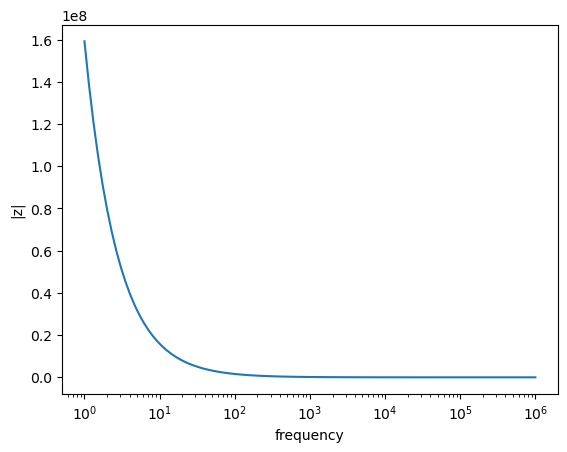

In [8]:
feq = np.logspace(0, 6, 100)

# Calculate corresponding y values using the function
impedance_abs = [impedance_abs(2*pi*f*1j) for f in feq]
impedance_arg = [impedance_arg(2*pi*f*1j) for f in feq]

# Plot the data on a semi-log scale
plt.semilogx(feq, impedance_abs)

# Add labels and title
plt.xlabel('frequency')
plt.ylabel('|z|')
#plt.title('frequency vs. impedance_abs')

# Show the plot
plt.show()

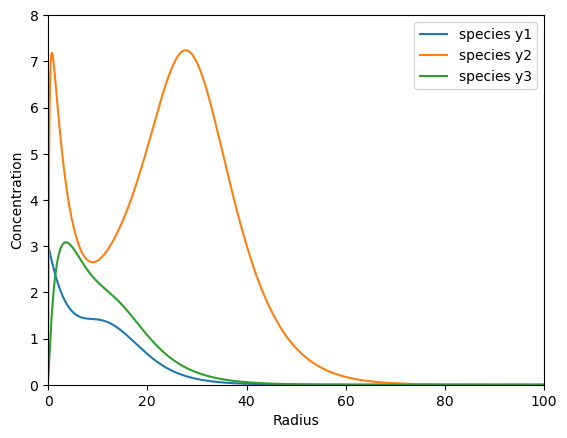

In [52]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

# Define the ODE
def PbSring2(t, y):
    dydt = [0,0,0]
    
    mu_max=0.4; K_m = 0.4; K1=1.8; U=0.5; K2 = 0.5; K3=0.5; K_c=15; alpha=6; beta=2.5; delta=0.05; gamma1=0.1; gamma2=0.1; gamma3=0.1; m=2; n=2; p=2; Y_XM=20;
    
    X = y[0]
    Y = y[1]
    Z = y[2]
    
    mu = mu_max*Z/(K_m+Z)/(1+(Y/K1)**m)*(1-X/K_c);
    dydt[0] = (mu*X-gamma1*X)/U;
    dydt[1] = (alpha*X/(1+(Z/K2)**n)-beta*X*Y/(K3+Y)*(2*X/K_c)**p-gamma2*Y)/U;
    dydt[2] = (delta*X + beta*X*Y/(K3+Y)*(2*X/K_c)**p - mu*X/Y_XM - gamma3*Z)/U;
    
    return dydt

# Set the initial condition and the space range
l0=0
lf=100
radspan=np.linspace(l0, lf, 1001)
y1_0=3; y2_0=0.3; y3_0=0.10;

# Solve the ODE using solve_ivp
sol = solve_ivp(PbSring2, [l0, lf], [y1_0, y2_0, y3_0], method='RK45', t_eval=radspan)

# Plot the solution
plt.plot(sol.t, sol.y[0], label='species y1')
plt.plot(sol.t, sol.y[1], label='species y2')
plt.plot(sol.t, sol.y[2], label='species y3')

plt.xlabel('Radius')
plt.ylabel('Concentration')
plt.xlim(l0,lf)
plt.ylim(0,8)
plt.legend()

# Show the figure of the spatial solution
plt.show()

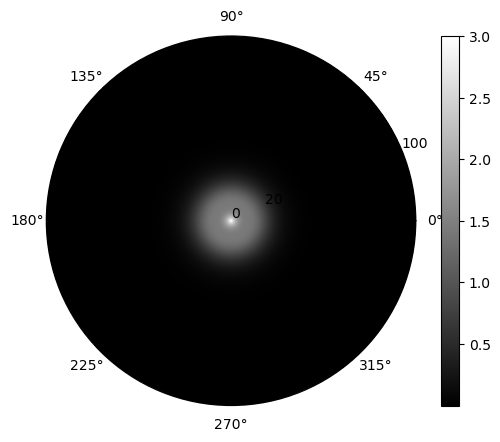

In [54]:
# plot the spatial distribution of the concentration of y1 species in the polar representation
fig = plt.figure()
ax = Axes3D(fig)

azm = np.linspace(0, 2 * np.pi, 1001)
r, th = np.meshgrid(radspan, azm)
z1, ph = np.meshgrid(sol.y[0], azm)

plt.subplot(projection="polar")
plt.pcolormesh(th, r, z1, cmap=cm.gray)
plt.plot(azm, r, color='k', ls='none')

plt.colorbar()
plt.grid()

plt.show()

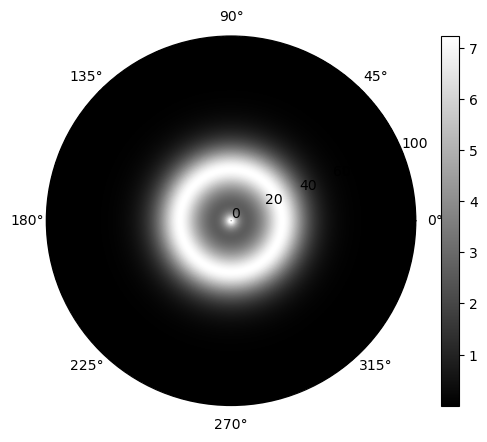

In [55]:
# plot the spatial distribution of the concentration of y2 species in the polar representation
fig = plt.figure()
ax = Axes3D(fig)

azm = np.linspace(0, 2 * np.pi, 1001)
r, th = np.meshgrid(radspan, azm)
z1, ph = np.meshgrid(sol.y[1], azm)

plt.subplot(projection="polar")
plt.pcolormesh(th, r, z1, cmap=cm.gray)
plt.plot(azm, r, color='k', ls='none')

plt.colorbar()
plt.grid()

plt.show()

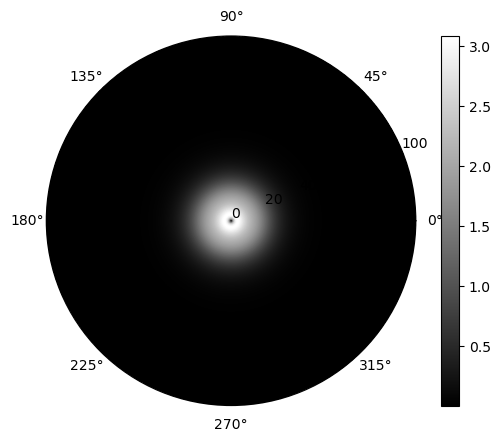

In [114]:
import cmath

# Create a complex number
z = -1 + 0j

# Calculate the phase of the complex number in radians
phase_rad = cmath.phase(z)

print(f"Complex number: {z}")
print(f"Phase (in radians): {phase_rad}")


Complex number: (-1+0j)
Phase (in radians): 3.141592653589793


In [115]:
np.logspace(0, 6, 100)

array([1.00000000e+00, 1.14975700e+00, 1.32194115e+00, 1.51991108e+00,
       1.74752840e+00, 2.00923300e+00, 2.31012970e+00, 2.65608778e+00,
       3.05385551e+00, 3.51119173e+00, 4.03701726e+00, 4.64158883e+00,
       5.33669923e+00, 6.13590727e+00, 7.05480231e+00, 8.11130831e+00,
       9.32603347e+00, 1.07226722e+01, 1.23284674e+01, 1.41747416e+01,
       1.62975083e+01, 1.87381742e+01, 2.15443469e+01, 2.47707636e+01,
       2.84803587e+01, 3.27454916e+01, 3.76493581e+01, 4.32876128e+01,
       4.97702356e+01, 5.72236766e+01, 6.57933225e+01, 7.56463328e+01,
       8.69749003e+01, 1.00000000e+02, 1.14975700e+02, 1.32194115e+02,
       1.51991108e+02, 1.74752840e+02, 2.00923300e+02, 2.31012970e+02,
       2.65608778e+02, 3.05385551e+02, 3.51119173e+02, 4.03701726e+02,
       4.64158883e+02, 5.33669923e+02, 6.13590727e+02, 7.05480231e+02,
       8.11130831e+02, 9.32603347e+02, 1.07226722e+03, 1.23284674e+03,
       1.41747416e+03, 1.62975083e+03, 1.87381742e+03, 2.15443469e+03,
      

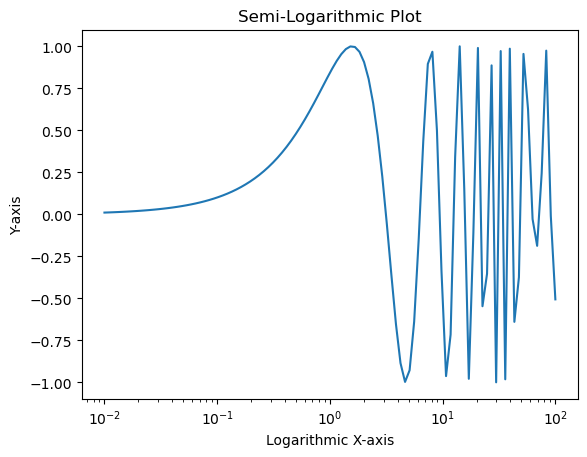

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.logspace(-2, 2, 100)  # Logarithmic x-axis
y = np.sin(x)

# Plot the data on a semi-log scale
plt.semilogx(x, y)

# Add labels and title
plt.xlabel('Logarithmic X-axis')
plt.ylabel('Y-axis')
plt.title('Semi-Logarithmic Plot')

# Show the plot
plt.show()
